<a href="https://colab.research.google.com/github/JuanFdoGf/MachineLearningProjects/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Cargar el conjunto de datos

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Explorar el conjunto de datos

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   ta

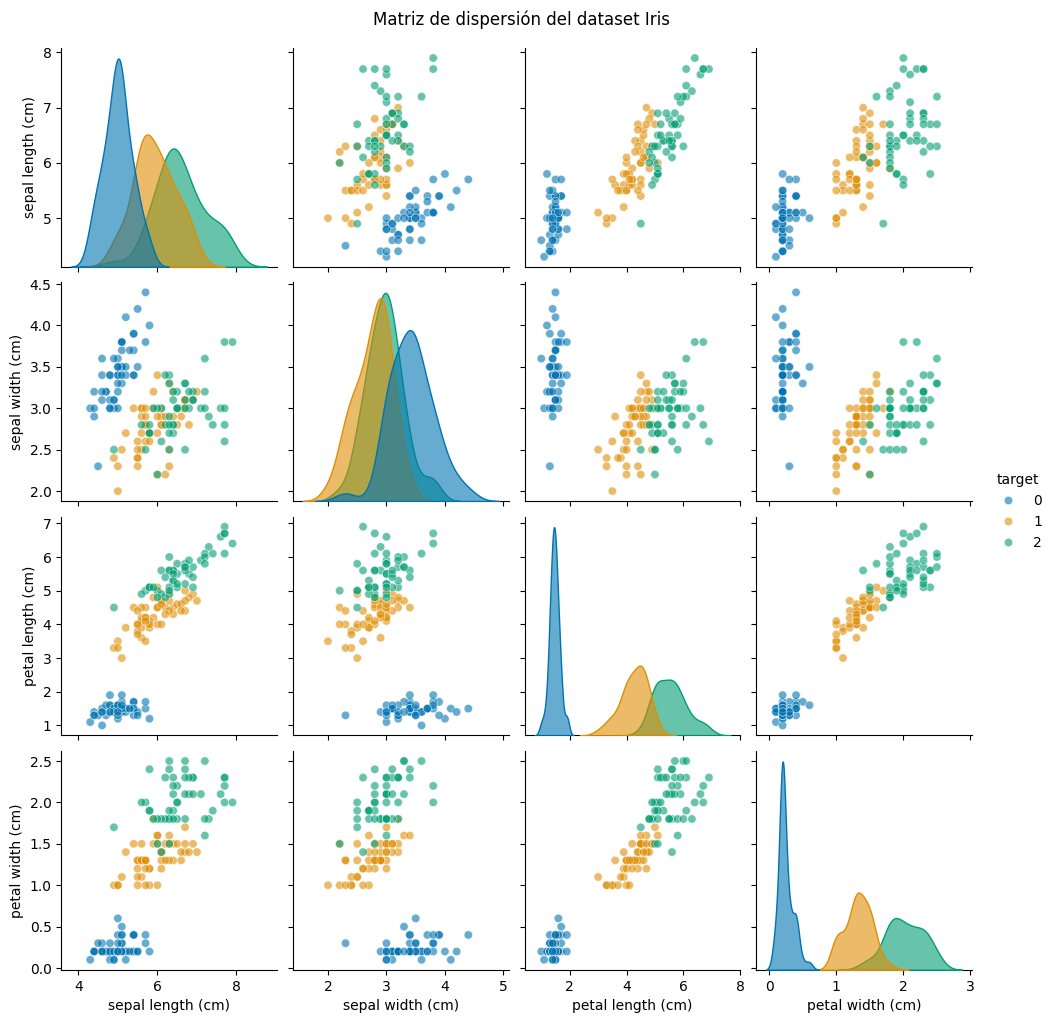

In [3]:
# Primeras filas del dataset
print('Primeras filas del dataset:')
print(df.head())

# Información general sobre las columnas y los datos
print('\nInformación del dataset:')
print(df.info())

# Descripción estadística de las características
print('\nEstadísticas descriptivas:')
print(df.describe())

# Visualización inicial de las características
sns.pairplot(
    df, hue='target', palette='colorblind', diag_kind='kde',
    plot_kws={'alpha': 0.6},
    diag_kws={'alpha': 0.6}
)
plt.suptitle('Matriz de dispersión del dataset Iris', y=1.02)
plt.show()

## Análisis de la correlación entre características

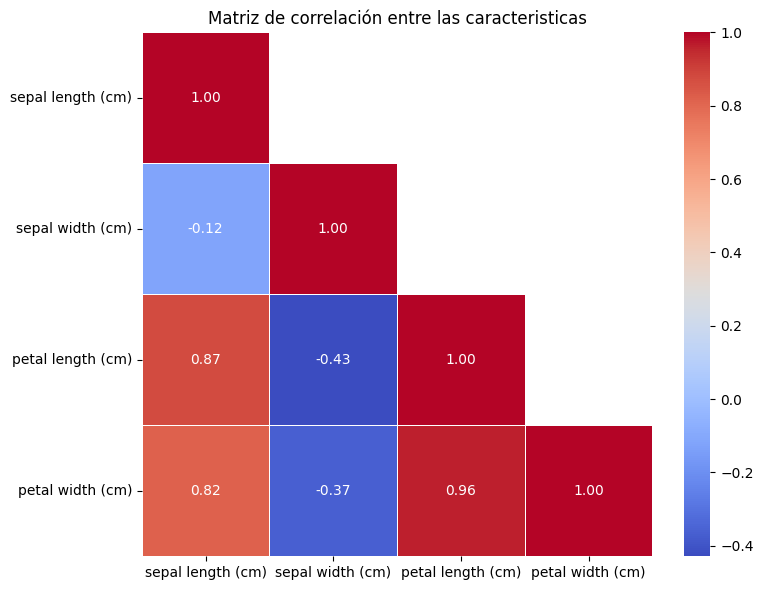

In [4]:
# Calcular la matriz de correlación
correlation_matrix = df.drop('target', axis=1).corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm',
    fmt='.2f',
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1),
    linewidths=0.5
)
plt.title('Matriz de correlación entre las caracteristicas')
plt.tight_layout()
plt.show()

## Preprocesamiento de los datos

In [5]:
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
X = df.drop('target', axis=1)
Y = df['target']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Enseñar las primeras filas de los datos escalados
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## División del conjunto de datos

In [6]:
from sklearn.model_selection import train_test_split

# División de los datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

# Enseñamos las formas de los conjuntos
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (120, 4)
X_test shape: (30, 4)


## Entrenamiento del modelo

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nMatriz de confusión:')
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_test)
print(report)

Accuracy: 100.00%

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, Y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Average cross-validation score: 0.96


## Modelo SVM

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenamiento del modelo SMV con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Realizamos predicciones
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'\nSVM Accuracy: {accuracy_svm * 100:.2f}%')

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('\nSVM Matriz de Confusión:')
print(conf_matrix_svm)

# Reporte de clasificación
report_svm = classification_report(y_test, y_pred_svm)
print('\nSVM Reporte de Clasificación:')
print(report_svm)


SVM Accuracy: 96.67%

SVM Matriz de Confusión:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

SVM Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Ajuste de hiperparámetros con GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'kernel': ['linear', 'rbf'], # Tipos de kernel
    'gamma': ['scale', 'auto'] # Solo relevante para el kernel RBF
}

# Configurar GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor modelo
best_svm_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores parámetros
y_pred_best_svm = best_svm_model.predict(X_test)

# Precisión del mejor modelo
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f'\nMejor SVM Accuracy: {accuracy_best_svm * 100:.2f}%')

# Matriz de confusión
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)
print('\nMejor SVM Matriz de Confusión:')
print(conf_matrix_best_svm)

# Reporte de clasificación
report_best_svm = classification_report(y_test, y_pred_best_svm)
print('\nMejor SVM Reporte de Clasificación:')
print(report_best_svm)


Mejor SVM Accuracy: 96.67%

Mejor SVM Matriz de Confusión:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Mejor SVM Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

